# Data Exploration

The work is primarly interested in the label (the type of mole/skin lesion),
and the image itself.

In [11]:
import random
import os
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
# Define a configuration dictionary, this is used to store all the
# hyperparameters and other configuration settings, in a single location

CONFIG = {
    "base_path": "/home/rob/",
    "csv_file": "ham10000_data/HAM10000_metadata.csv",
    "img_dir": "ham10000_data/images",
    "file_ext": ".jpg",
    "random_seed": 42,
}

# Set random seeds for reproducibility

random.seed(CONFIG["random_seed"])


In [13]:
# Load the CSV file into a pandas dataframe

df = pd.read_csv(CONFIG["base_path"] + CONFIG["csv_file"])
df['image_path'] = df['image_id'].apply(lambda x: os.path.join(CONFIG["base_path"] + CONFIG["img_dir"], x + CONFIG["file_ext"]))

print(df.head())

     lesion_id      image_id   dx dx_type   age   sex localization  \
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0  male        scalp   
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0  male        scalp   
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0  male        scalp   
3  HAM_0002730  ISIC_0025661  bkl   histo  80.0  male        scalp   
4  HAM_0001466  ISIC_0031633  bkl   histo  75.0  male          ear   

                                        image_path  
0  /home/rob/ham10000_data/images/ISIC_0027419.jpg  
1  /home/rob/ham10000_data/images/ISIC_0025030.jpg  
2  /home/rob/ham10000_data/images/ISIC_0026769.jpg  
3  /home/rob/ham10000_data/images/ISIC_0025661.jpg  
4  /home/rob/ham10000_data/images/ISIC_0031633.jpg  


In [14]:
# Check for missing values in the dataframe

print(df.isnull().sum())

lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
image_path       0
dtype: int64


In [15]:
# Show duplicate rows in the dataframe

print(df[df.duplicated()])

Empty DataFrame
Columns: [lesion_id, image_id, dx, dx_type, age, sex, localization, image_path]
Index: []


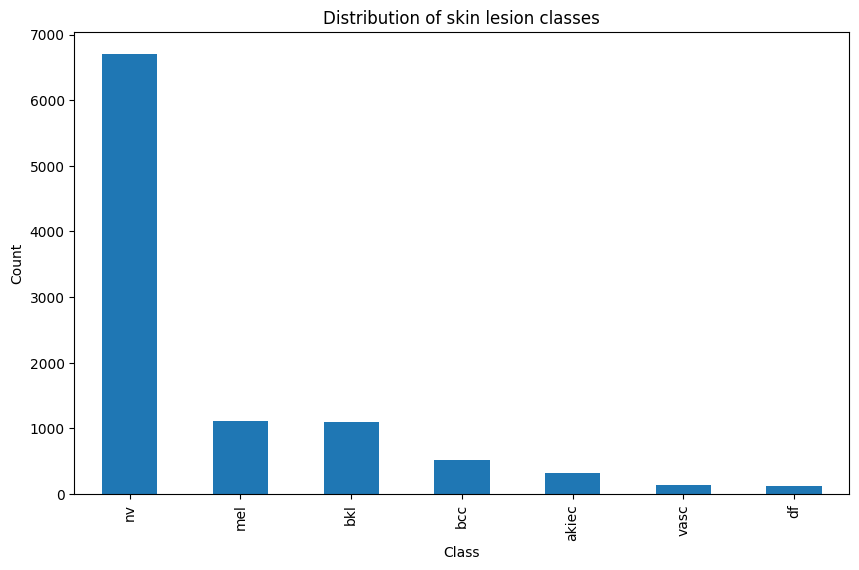

In [16]:
# Plot the distribution of the different classes

plt.figure(figsize=(10, 6))
df['dx'].value_counts().plot(kind='bar')
plt.title('Distribution of skin lesion classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [17]:
# How many Melanoma cases are there?

print(df['dx'].value_counts())

dx
nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: count, dtype: int64


In [18]:
# show duplicates

print(df.duplicated().sum())

0


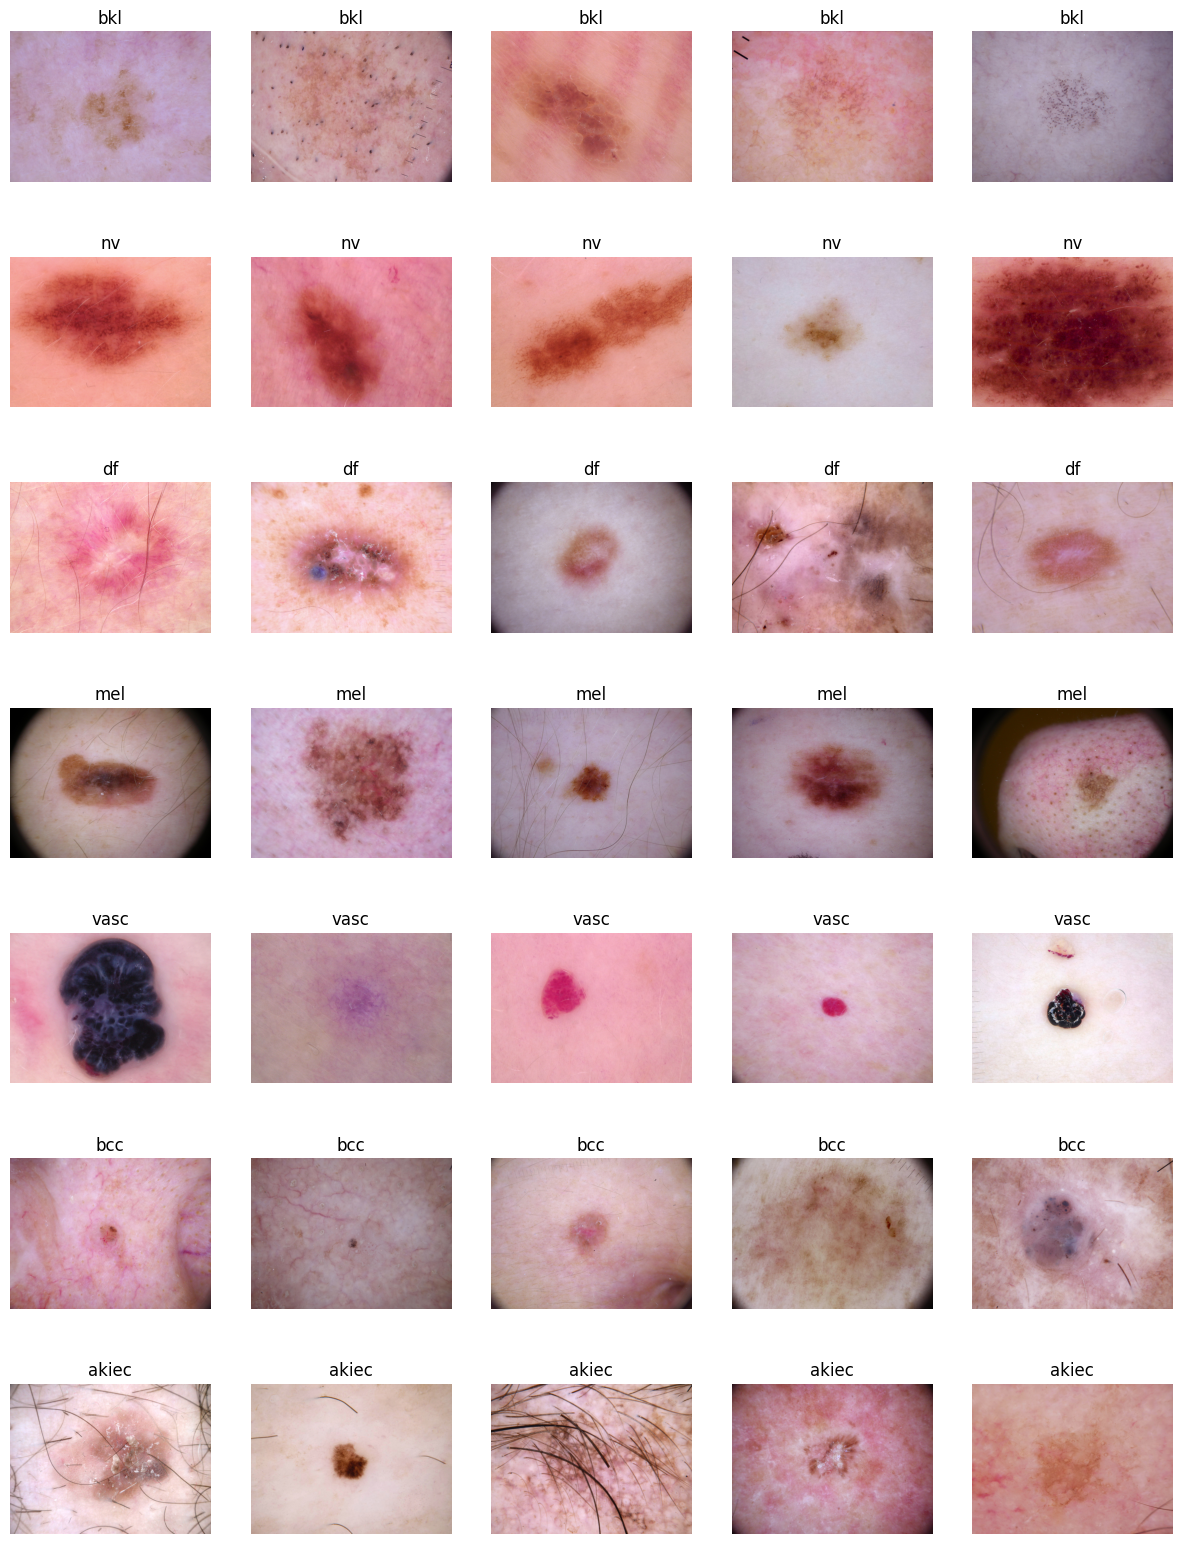

In [20]:
# Plot a few images from the dataset, a row for each class, randomly

plt.figure(figsize=(15, 20))
for i, class_name in enumerate(df['dx'].unique()):
    for j in range(5):
        # select a random image from the class
        img_path = df[df['dx'] == class_name].sample(1)['image_path'].values[0]
        plt.subplot(7, 5, i * 5 + j + 1)
        plt.imshow(plt.imread(img_path))
        plt.title(class_name)
        plt.axis('off')

plt.show()